In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})
import pandas as pd
from fase.fileio import Table
from cosmology import *
from edge import *
import sys

# Variables

In [3]:
NOQUENCH_45 = pd.read_csv('../VIPERS/SYNTHETIC/NO_QUENCH/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])

QUENCH0_45 = pd.read_csv('../VIPERS/SYNTHETIC/QUENCH_0/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])

QUENCH1_45 = pd.read_csv('../VIPERS/SYNTHETIC/QUENCH_1/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])

QUENCH2_45 = pd.read_csv('../VIPERS/SYNTHETIC/QUENCH_2/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])

QUENCH3_45 = pd.read_csv('../VIPERS/SYNTHETIC/QUENCH_3/SYNTHETIC_points_1013_45.txt',sep = ' ',usecols=[0,1],comment='#',names=['uv','v'])

In [4]:
REAL = Table("../../Data_Sample_V7.fits",hdu=8) # This table is the match between Bologna and Milano

In [69]:
U = REAL.getCol("M_Uj")
V = REAL.getCol("M_V")
UV =U-V
Z = REAL.getCol("zspec_1")

TAU = REAL.getCol("TAU_2")
AGE = REAL.getCol("AGE_2")
log_mass = REAL.getCol("log_stellar_mass")


SFR_SED_log = np.array(REAL.getCol("Log_SFR_Gossip"))
SFR_OII_log = np.array(REAL.getCol("sfrOIIMoust"))

NoiseToSignal = np.array(REAL.getCol("noiseRatio"))

sel_0405, = np.where((Z>0.4)&(Z<=0.5))
sel_0506, = np.where((Z>0.5)&(Z<=0.6))
sel_0607, = np.where((Z>0.6)&(Z<=0.7))
sel_0708, = np.where((Z>0.7)&(Z<=0.8))
sel_0809, = np.where((Z>0.8)&(Z<=0.9))
sel_0910, = np.where((Z>0.9)&(Z<=1.0))
sel_1011, = np.where((Z>1.0)&(Z<=1.1))
sel_1013, = np.where((Z>1.0)&(Z<=1.3))

# z-COSMOS variables

In [6]:
zCOSMOS = Table("../../absmags_zcosmos_bright4.2.dat")

In [7]:
cZ = zCOSMOS.getCol("2.ZSPEC")
cU = zCOSMOS.getCol("5.MU_JKC")
cV = zCOSMOS.getCol("7.MV_JKC")
cUV = cU-cV

In [9]:
c_sel_0405 = np.where((cZ>0.4)&(cZ<=0.5))
c_sel_0506 = np.where((cZ>0.5)&(cZ<=0.6))
c_sel_0607 = np.where((cZ>0.6)&(cZ<=0.7))
c_sel_0708 = np.where((cZ>0.7)&(cZ<=0.8))
c_sel_0809 = np.where((cZ>0.8)&(cZ<=0.9))
c_sel_0910 = np.where((cZ>0.9)&(cZ<=1.0))
c_sel_1011 = np.where((cZ>1.0)&(cZ<=1.1))
c_sel_1013 = np.where((cZ>1.0)&(cZ<=1.3))

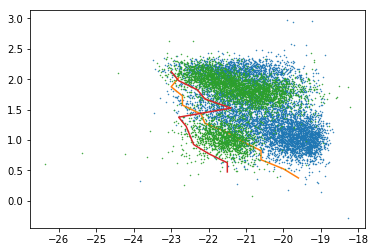

In [10]:
plt.plot(V[sel_0405],U[sel_0405]-V[sel_0405],'.',markersize=1)
plt.plot(EDGE(V[sel_0405],U[sel_0405]-V[sel_0405],y_min=0.3,y_max=2.2)[0],
         EDGE(V[sel_0405],U[sel_0405]-V[sel_0405],y_min=0.3,y_max=2.2)[1])
plt.plot(NOQUENCH_45['v'],NOQUENCH_45['uv'],'.',markersize=1)
plt.plot(EDGE(np.array(NOQUENCH_45['v']),np.array(NOQUENCH_45['uv']),y_min=0.4,y_max=2.2)[0],
         EDGE(np.array(NOQUENCH_45['v']),np.array(NOQUENCH_45['uv']),y_min=0.4,y_max=2.2)[1])
plt.show()

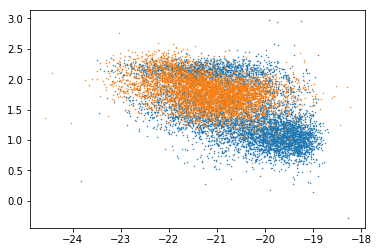

In [11]:
plt.plot(V[sel_0405],U[sel_0405]-V[sel_0405],'.',markersize=1)
plt.plot(QUENCH3_45['v'],QUENCH3_45['uv'],'.',markersize=1)
plt.show()

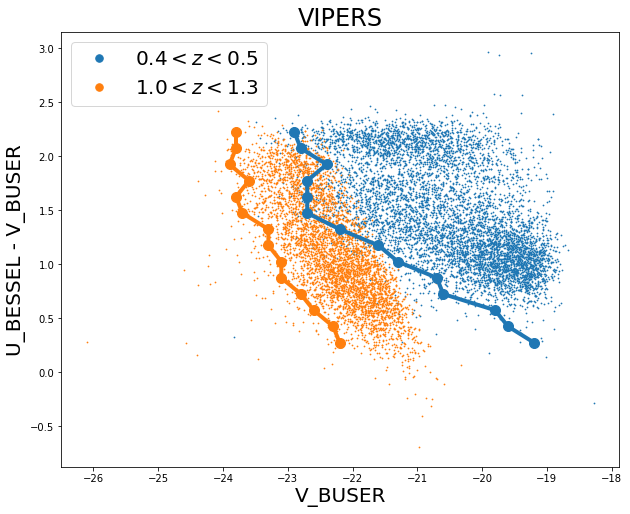

In [12]:
xedge_vip_zlow,yedge_vip_zlow   = EDGE(V[sel_0405],UV[sel_0405],x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)
xedge_vip_zhigh,yedge_vip_zhigh = EDGE(V[sel_1013],UV[sel_1013],x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)

plt.figure(figsize=(10,8))
plt.plot(V[sel_0405],UV[sel_0405],".",markersize=1.5,color='C0',label=r'$0.4<z<0.5$')
plt.plot(V[sel_1013],UV[sel_1013],".",markersize=1.5,color='C1',label=r'$1.0<z<1.3$')
plt.plot(xedge_vip_zlow,yedge_vip_zlow,"-",lw=4,color='C0')
plt.plot(xedge_vip_zhigh,yedge_vip_zhigh,"-",lw=4,color='C1')
plt.plot(xedge_vip_zlow,yedge_vip_zlow,".",lw=4,color='C0',markersize=20)
plt.plot(xedge_vip_zhigh,yedge_vip_zhigh,".",lw=4,color='C1',markersize=20)
plt.legend(markerscale=10)
plt.xlabel("V_BUSER")
plt.ylabel("U_BESSEL - V_BUSER")
plt.title('VIPERS')
#plt.savefig('../plots/011/bright_edge_VIPERS.png')
plt.show()

In [13]:
def histo_in_colour_bin_general_1(min_col,max_col,u,v,i,redshift,thr=0.15,xbsz=0.1,save=True,path='./plots/image.png'):
    plt.figure(figsize=(10,8))
    
    #sec = np.where(i<ABSOLUTE_MAGNITUDE_minus5logh(22.5,z=redshift))
    
    #sec = np.where((2>1))
    
    u= np.array(u)
    v=np.array(v)
    i=np.array(i)
    
    select_colour_bin = np.where(((u-v)<max_col)&((u-v)>min_col))
    
    plt.hist(v[select_colour_bin],bins=int((25-19)/xbsz),range=(-26,-18),label=str(min_col)+'<U-V<'+str(max_col))
    #print(int((22-10)/0.1))
    
    counts,b = np.histogram(v[select_colour_bin],bins=int((26-18)/xbsz),range=(-26,-18))
    
    #plt.axvline(b[np.where(counts==np.max(counts))],c='k',lw=3)
    plt.axvline(b[np.argmax(counts)],c='k',lw=3)
    
    
    #loop to find the edge
    for j in range(np.argmax(counts),0,-1):
        if (counts[j]<np.max(counts) * thr):
            edge_index = j
            break
    plt.axvline(b[j],c='k',lw=3)
    plt.xlabel("mag_V_ext")
    plt.ylabel('counts')
    plt.legend()
    if save:
        plt.savefig(path)

    plt.show()


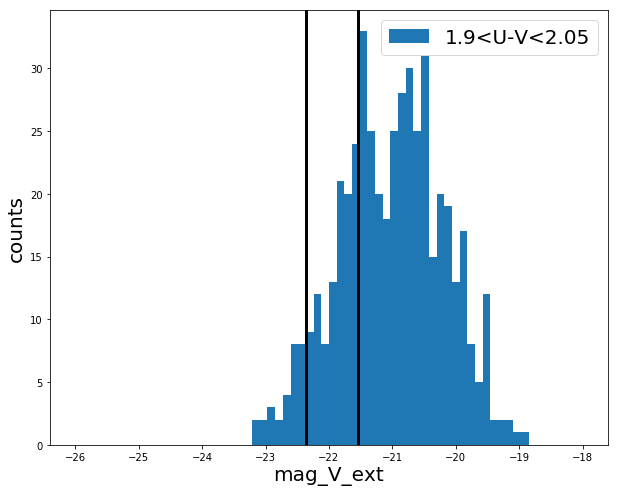

In [14]:
histo_in_colour_bin_general_1(min_col=1.90,
                            max_col=2.05,
                            v=np.array(V[sel_0405]),
                            u=np.array(U[sel_0405]),
                            i=np.array(V[sel_0405]),
                            redshift=0.456,
                            xbsz=0.09,
                            thr=0.15,
                            path='../plots/011/VIPERS_histo_190_205.png')

In [15]:
#del sys.modules['edge']

In [16]:
#from edge import *

In [17]:
max_col = 1.05
min_col = 1.00
select_colour_bin = np.where(((UV[sel_0405])<max_col)&(UV[sel_0405]>min_col))

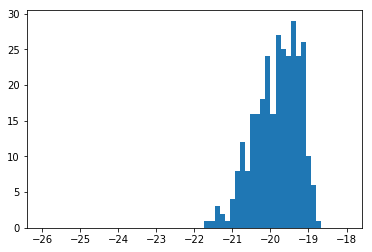

In [18]:
plt.hist(V[sel_0405][select_colour_bin],bins=int((25-19)/0.1),range=(-26,-18),label=str(min_col)+'<U-V<'+str(max_col))
plt.show()

# Figure 1 paper

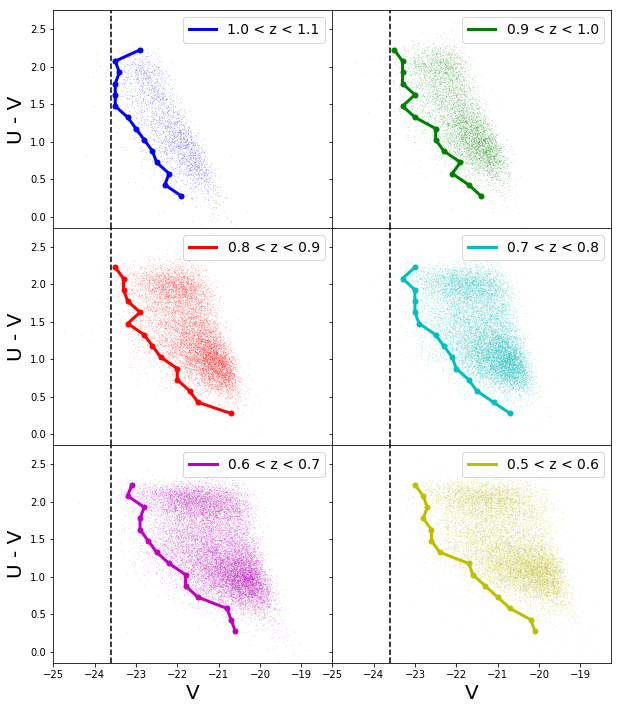

In [19]:
REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    plt.axvline(x=-23.6,linestyle='dashed',color="k")

    plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.1)#label=str(zlow)+" < z < "+str(zhigh)

    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("U - V")
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel("V")


    plt.plot(x_term,y_term,lw=3,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k])
    plt.plot(x_term,y_term,".",markersize=10,c=stylecolor[k])
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    ax2.axis([-25,-18.255,-0.15,2.75])
    ax2.legend(markerscale=2,numpoints=1,fontsize="x-small",loc="upper right")


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
plt.subplots_adjust(wspace=0,hspace=0)
#plt.savefig("../plots/011/COLMAG_6BINS_1011.PNG")

# Figure 3

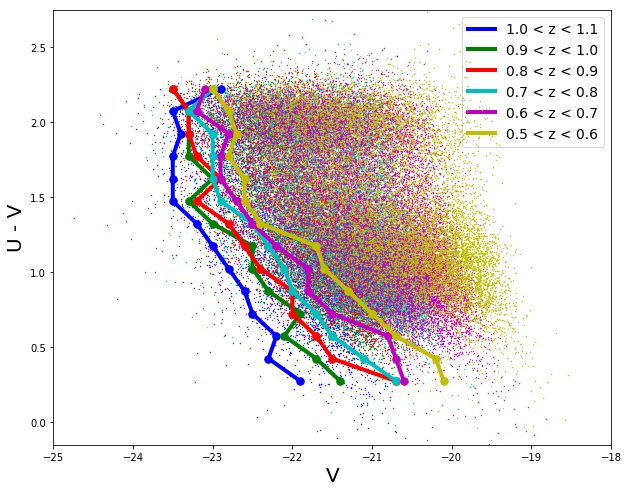

In [20]:
REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

#REDSHIFT_BINS=[0.5,0.8,1.1]
#REDSHIFT_BINS=[0.5,0.7,0.9,1.1]

fig =plt.figure(figsize=(10,8))

k=0
a=1

for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)

    plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.9,zorder=a)#label=str(zlow)+" < z < "+str(zhigh)
    
    plt.ylabel("U - V")
    plt.xlabel("V")

    plt.plot(x_term,y_term,lw=4,label=str(zlow)+" < z < "+str(zhigh),c=stylecolor[k],zorder=a+100)
    plt.plot(x_term,y_term,".",markersize=15,c=stylecolor[k],zorder=a+100)
    plt.axis([-25,-18,-0.15,2.75])
    plt.legend(markerscale=2,numpoints=1,fontsize="x-small",loc="upper right")


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
#plt.savefig("../plots/011/COLMAG_6BINS_ALL_1011.PNG")

In [21]:
ABSOLUTE_MAGNITUDE_minus5logh(22.5,0.45)+5*np.log10(0.7)

-19.489046529254097

# Fig. 2 (Comparison z-COSMOS)

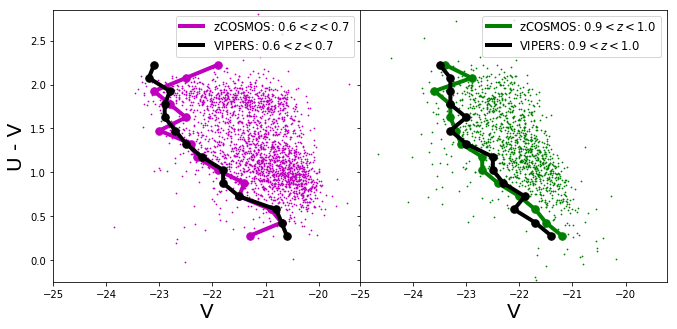

In [22]:
#plt.figure(figsize=(14,8))
plt.figure(figsize=(11,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.axis([-25.,-19.22,-0.25,2.85])
ax2.axis([-25.,-19.22,-0.25,2.85])
plt.setp(ax2.get_yticklabels(),visible=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax1.plot(cV[c_sel_0607],cUV[c_sel_0607],".m",markersize=1.5)
ax2.plot(cV[c_sel_0910],cUV[c_sel_0910],".g",markersize=1.5)


cx1,cy1 = EDGE(cV[c_sel_0607],cUV[c_sel_0607],x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)
ax1.plot(cx1,cy1,"-m",lw=4,label=r"zCOSMOS: $0.6<z<0.7$")
ax1.plot(cx1,cy1,".m",markersize=15)

vx1,vy1 = EDGE(V[sel_0607],UV[sel_0607],x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)
ax1.plot(vx1,vy1,"-k",lw=4,label=r"VIPERS: $0.6<z<0.7$")
ax1.plot(vx1,vy1,".k",markersize=15)


cx2,cy2 = EDGE(cV[c_sel_0910],cUV[c_sel_0910],x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)
ax2.plot(cx2,cy2,"-g",lw=4,label=r"zCOSMOS: $0.9<z<1.0$")
ax2.plot(cx2,cy2,".g",markersize=15)

vx2,vy2 = EDGE(V[sel_0910],UV[sel_0910],x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)
ax2.plot(vx2,vy2,"-k",lw=4,label=r"VIPERS: $0.9<z<1.0$")
ax2.plot(vx2,vy2,".k",markersize=15)


ax1.set_ylabel("U - V")
ax1.set_xlabel("V")
ax2.set_xlabel("V")

ax1.legend(loc=1,fontsize="xx-small")
ax2.legend(loc=1,fontsize="xx-small")

#plt.savefig("../plots/011/COLMAG_zCOSMOS_VIPERS_.PNG")
plt.show()

# Fig 5 (SFR HISTO)

In [23]:
good_SIGNAL = np.where((NoiseToSignal<0.33)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf))

log_RATIO_SED_OII = SFR_SED_log[good_SIGNAL] -SFR_OII_log[good_SIGNAL] #- np.log10(0.33)
log_RATIO_SED_OII_corrected = SFR_SED_log[good_SIGNAL] -SFR_OII_log[good_SIGNAL] - np.log10(0.33)

print('NOT CORRECTED')
print("log median: "+str(np.median(log_RATIO_SED_OII)))
print("log mean: "+str(np.mean(log_RATIO_SED_OII)))
print("log std: "+str(np.std(log_RATIO_SED_OII)))

print("\n --- \n")

print('CORRECTED')
print("log median: "+str(np.median(log_RATIO_SED_OII_corrected)))
print("log mean: "+str(np.mean(log_RATIO_SED_OII_corrected)))
print("log std: "+str(np.std(log_RATIO_SED_OII_corrected)))

NOT CORRECTED
log median: -0.42780392191060956
log mean: -0.442929169628149
log std: 0.33963077652770973

 --- 

CORRECTED
log median: 0.05368213821150292
log mean: 0.03855689049396351
log std: 0.33963077652770973


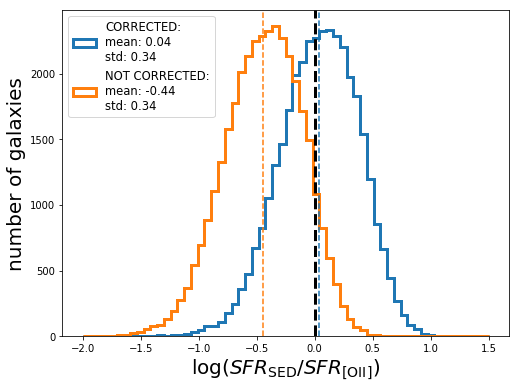

In [24]:
plt.figure(figsize=(8,6))

plt.hist(log_RATIO_SED_OII_corrected,bins=60,range=(-2,1.5),histtype='step',lw=3,color="C0",
         label="CORRECTED:\nmean: "+str(round(np.mean(log_RATIO_SED_OII_corrected),2))+"\nstd: "+str(round(np.std(log_RATIO_SED_OII_corrected),2))+" ")

plt.axvline(np.mean(log_RATIO_SED_OII_corrected),color='C0',ls='dashed')
#plt.axvline(np.median(log_RATIO_SED_OII_corrected),color='C0',ls='dashed')


plt.hist(log_RATIO_SED_OII,bins=60,range=(-2,1.5),histtype='step',lw=3,color="C1",
         label="NOT CORRECTED:\nmean: "+str(round(np.mean(log_RATIO_SED_OII),2))+"\nstd: "+str(round(np.std(log_RATIO_SED_OII),2))+" ")

plt.axvline(np.mean(log_RATIO_SED_OII),color='C1',ls='dashed')
#plt.axvline(np.median(log_RATIO_SED_OII),color='C1',ls='dashed')

plt.axvline(0.,c='k',ls='--',lw=3)


plt.xlabel(r"$\log \left( SFR_{\rm{SED}} / SFR_{\rm{[OII]}} \right)$")
plt.ylabel("number of galaxies")
plt.legend(fontsize="xx-small",loc=2)

#plt.savefig("../plots/011/SFR_HISTO.PNG")

plt.show()

In [25]:
10**(-0.44)

0.36307805477010135

In [26]:
10**(0.33)

2.137962089502232

# Fig 6 (SFR in colour bins)

In [27]:
def MAD(vector):
    return np.median(np.fabs(vector - np.median(vector)))


def sfr_in_colour(sfr,clr,clr_min=0.55,clr_max=2.1,clr_bin_size=0.15,median=True,log=True):
    '''It returns two arrays containing the x and y of the edge'''
    clr_Nbins = int((clr_max - clr_min) / clr_bin_size)

    m_sfr=[]
    m_clr=[]
    s_sfr=[]
    s_clr=[]

    for i in range(clr_Nbins):
        clr_low = clr_min + clr_bin_size * i
        clr_high = clr_min + clr_bin_size * (i+1)
        clr_center = (clr_low+clr_high)/2.
        
        select_clr_bin = np.where((clr>=clr_low)&(clr<clr_high))
        
        if median:
            if log:
                m_sfr.append(np.median(sfr[select_clr_bin]))
                s_sfr.append(MAD(sfr[select_clr_bin]))
            else:
                m_sfr.append(np.median(10**sfr[select_clr_bin]))
                s_sfr.append(MAD(10**sfr[select_clr_bin]))
        else:
            if log:
                m_sfr.append(np.mean(sfr[select_clr_bin]))
                s_sfr.append(np.std(sfr[select_clr_bin]))
            else:
                m_sfr.append(np.mean(10**sfr[select_clr_bin]))
                s_sfr.append(np.std(10**sfr[select_clr_bin]))
        m_clr.append(clr_center)
        s_clr.append(MAD(clr[select_clr_bin]))

    return np.array(m_sfr), np.array(m_clr), np.array(s_sfr), np.array(s_clr)


In [28]:
x,y ,ex,ey= sfr_in_colour(SFR_SED_log[good_SIGNAL and sel_0607],UV[good_SIGNAL and sel_0607],median=True,log=False)
x1,y1,ex1,ey1 = sfr_in_colour(SFR_OII_log[good_SIGNAL and sel_0607],UV[good_SIGNAL and sel_0607],median=True,log=False)

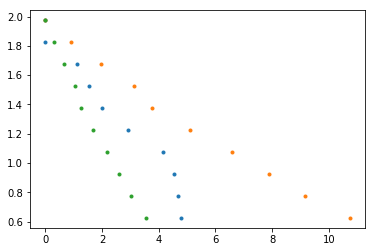

In [29]:
plt.plot(x,y,".")
plt.plot(x1,y1,".")
plt.plot(x1*0.33,y1,".")
#plt.xlim(0,20)
plt.show()

In [30]:
sel_0607

array([    3,     5,     7, ..., 73152, 73154, 73159])

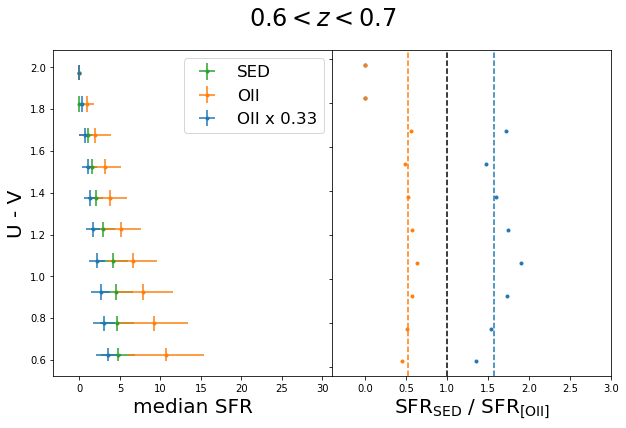

In [34]:
plt.figure(figsize=(10,6))

# 
#I might want to try the good signal for this plot 
#
#good_SIGNAL = np.where((NoiseToSignal<0.33)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf))

x,y ,ex,ey= sfr_in_colour(SFR_SED_log[sel_0607],UV[sel_0607],median=True,log=False)
x1,y1,ex1,ey1 = sfr_in_colour(SFR_OII_log[sel_0607],UV[sel_0607],median=True,log=False)

ax1 = plt.subplot(121)

ax1.errorbar(x,y,xerr=ex,yerr=ey,fmt=".",label='SED',c='C2')
ax1.errorbar(x1,y1,xerr=ex1,yerr=ey1,fmt=".",label='OII',c='C1')
ax1.errorbar(x1*0.33,y1,xerr=ex1*0.33,yerr=ey1,fmt=".",label='OII x 0.33',c='C0')

ax1.set_xlabel('median SFR')
ax1.set_ylabel('U - V')

ax1.set_xlim(-3.25,31.25)


ax1.legend(fontsize='small')
#plt.show()

ax2 = plt.subplot(122)

rat = x/x1
rat_corr=x/(x1*0.33)
ax2.axvline(np.median(rat_corr),c='C0',ls='--')
ax2.axvline(1,c='k',ls='--')
ax2.plot(rat_corr,y,".",c='C0')
ax2.axvline(np.median(rat),c='C1',ls='--')
ax2.plot(rat,y,".",c='C1')
ax2.set_xlim(-0.4,3)

ax2.set_xlabel(r'SFR$_{\rm{SED}}$ / SFR$_{\rm{[OII]}}$')

plt.setp(ax2.get_yticklabels(),visible=False)
plt.subplots_adjust(wspace=0,hspace=0)

plt.suptitle(r'$0.6<z<0.7$')
#plt.savefig("../plots/011/SFR_COLOUR_0607_median.PNG")


plt.show()

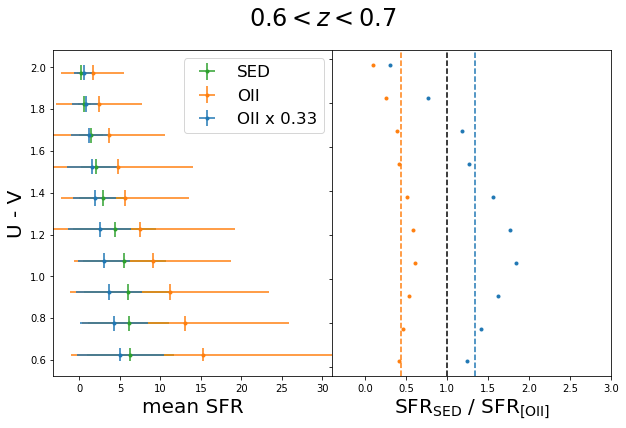

In [35]:
plt.figure(figsize=(10,6))
x,y ,ex,ey= sfr_in_colour(SFR_SED_log[sel_0607],UV[sel_0607],median=False,log=False)
x1,y1,ex1,ey1 = sfr_in_colour(SFR_OII_log[sel_0607],UV[sel_0607],median=False,log=False)

ax1 = plt.subplot(121)

ax1.errorbar(x,y,xerr=ex,yerr=ey,fmt=".",label='SED',c='C2')
ax1.errorbar(x1,y1,xerr=ex1,yerr=ey1,fmt=".",label='OII',c='C1')
ax1.errorbar(x1*0.33,y1,xerr=ex1*0.33,yerr=ey1,fmt=".",label='OII x 0.33',c='C0')

ax1.set_xlabel('mean SFR')
ax1.set_ylabel('U - V')

ax1.set_xlim(-3.25,31.25)


ax1.legend(fontsize='small')
#plt.show()

ax2 = plt.subplot(122)

rat = x/x1
rat_corr=x/(x1*0.33)
ax2.axvline(np.median(rat_corr),c='C0',ls='--')
ax2.axvline(1,c='k',ls='--')
ax2.plot(rat_corr,y,".",c='C0')
ax2.axvline(np.median(rat),c='C1',ls='--')
ax2.plot(rat,y,".",c='C1')
ax2.set_xlim(-0.4,3)

ax2.set_xlabel(r'SFR$_{\rm{SED}}$ / SFR$_{\rm{[OII]}}$')

plt.setp(ax2.get_yticklabels(),visible=False)
plt.subplots_adjust(wspace=0,hspace=0)

plt.suptitle(r'$0.6<z<0.7$')
#plt.savefig("../plots/011/SFR_COLOUR_0607_mean.PNG")


plt.show()

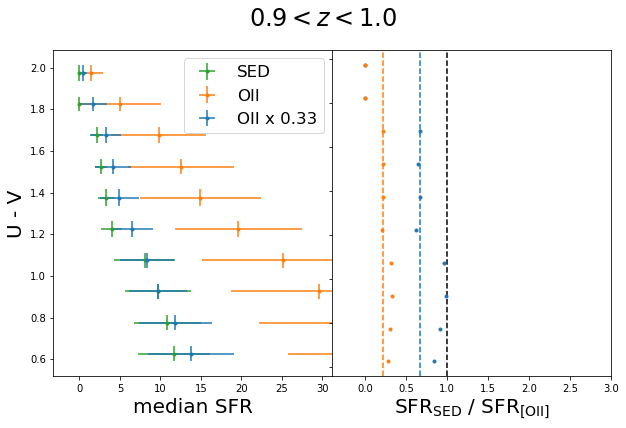

In [38]:
plt.figure(figsize=(10,6))
x,y ,ex,ey= sfr_in_colour(SFR_SED_log[sel_0910],UV[sel_0910],median=True,log=False)
x1,y1,ex1,ey1 = sfr_in_colour(SFR_OII_log[sel_0910],UV[sel_0910],median=True,log=False)

ax1 = plt.subplot(121)

ax1.errorbar(x,y,xerr=ex,yerr=ey,fmt=".",label='SED',c='C2')
ax1.errorbar(x1,y1,xerr=ex1,yerr=ey1,fmt=".",label='OII',c='C1')
ax1.errorbar(x1*0.33,y1,xerr=ex1*0.33,yerr=ey1,fmt=".",label='OII x 0.33',c='C0')

ax1.set_xlabel('median SFR')
ax1.set_ylabel('U - V')

ax1.set_xlim(-3.25,31.25)


ax1.legend(fontsize='small')
#plt.show()

ax2 = plt.subplot(122)

rat = x/x1
rat_corr=x/(x1*0.33)
ax2.axvline(np.median(rat_corr),c='C0',ls='--')
ax2.axvline(1,c='k',ls='--')
ax2.plot(rat_corr,y,".",c='C0')
ax2.axvline(np.median(rat),c='C1',ls='--')
ax2.plot(rat,y,".",c='C1')
ax2.set_xlim(-0.4,3)

ax2.set_xlabel(r'SFR$_{\rm{SED}}$ / SFR$_{\rm{[OII]}}$')

plt.setp(ax2.get_yticklabels(),visible=False)
plt.subplots_adjust(wspace=0,hspace=0)

plt.suptitle(r'$0.9<z<1.0$')
#plt.savefig("../plots/011/SFR_COLOUR_0910_median.PNG")


plt.show()

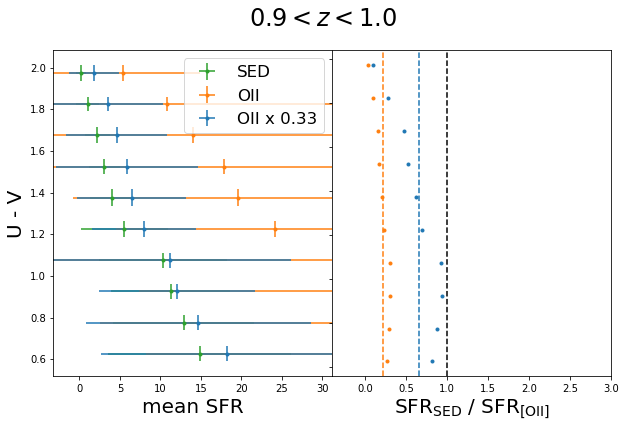

In [39]:
# ATTENTION: it is neglecting good signal... you can't use "and" in this way
# you have to use np.intersect1d or instead of useing np.where, just use selection = (condition) and then use "sel1 & sel2"

plt.figure(figsize=(10,6))
x,y ,ex,ey= sfr_in_colour(SFR_SED_log[good_SIGNAL and sel_0910],UV[good_SIGNAL and sel_0910],median=False,log=False)
x1,y1,ex1,ey1 = sfr_in_colour(SFR_OII_log[good_SIGNAL and sel_0910],UV[good_SIGNAL and sel_0910],median=False,log=False)

ax1 = plt.subplot(121)

ax1.errorbar(x,y,xerr=ex,yerr=ey,fmt=".",label='SED',c='C2')
ax1.errorbar(x1,y1,xerr=ex1,yerr=ey1,fmt=".",label='OII',c='C1')
ax1.errorbar(x1*0.33,y1,xerr=ex1*0.33,yerr=ey1,fmt=".",label='OII x 0.33',c='C0')

ax1.set_xlabel('mean SFR')
ax1.set_ylabel('U - V')

ax1.set_xlim(-3.25,31.25)


ax1.legend(fontsize='small')
#plt.show()

ax2 = plt.subplot(122)

rat = x/x1
rat_corr=x/(x1*0.33)
ax2.axvline(np.median(rat_corr),c='C0',ls='--')
ax2.axvline(1,c='k',ls='--')
ax2.plot(rat_corr,y,".",c='C0')
ax2.axvline(np.median(rat),c='C1',ls='--')
ax2.plot(rat,y,".",c='C1')
ax2.set_xlim(-0.4,3)

ax2.set_xlabel(r'SFR$_{\rm{SED}}$ / SFR$_{\rm{[OII]}}$')

plt.setp(ax2.get_yticklabels(),visible=False)
plt.subplots_adjust(wspace=0,hspace=0)

plt.suptitle(r'$0.9<z<1.0$')
#plt.savefig("../plots/011/SFR_COLOUR_0910_mean.PNG")

plt.show()

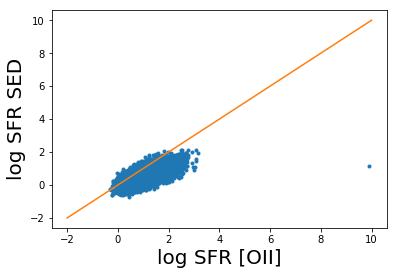

In [40]:
plt.plot(SFR_OII_log[good_SIGNAL],SFR_SED_log[good_SIGNAL],".")
plt.plot([-2,10],[-2,10])
plt.xlabel('log SFR [OII]')
plt.ylabel('log SFR SED')
#plt.savefig("../plots/011/outlier.PNG")
plt.show()

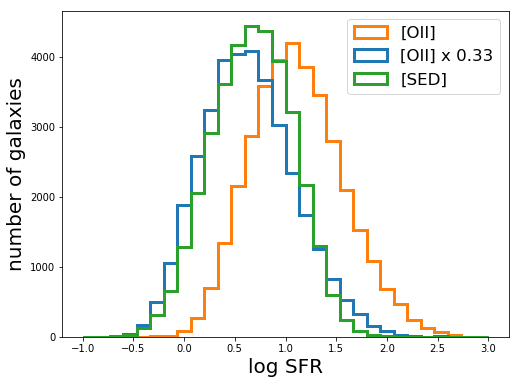

In [41]:
plt.figure(figsize=(8,6))
plt.hist(SFR_OII_log[good_SIGNAL],range=(-1,3),bins=30,histtype='step',lw=3,label='[OII]',color='C1')
plt.hist(SFR_OII_log[good_SIGNAL]+np.log10(0.33),range=(-1,3),bins=30,histtype='step',lw=3,label='[OII] x 0.33',color='C0')
plt.hist(SFR_SED_log[good_SIGNAL],range=(-1,3),bins=30,histtype='step',lw=3,label='[SED]',color='C2')
plt.xlabel('log SFR')
plt.ylabel('number of galaxies')
plt.legend(fontsize='small')
#plt.savefig("../plots/011/sfr_histos.PNG")
plt.show()

In [42]:
SFR_OII_log[good_SIGNAL]

array([1.696, 0.951, 0.969, ..., 0.319, 1.564, 0.712], dtype=float32)

In [43]:
SFR_OII_log[good_SIGNAL]*0.33

array([0.55968004, 0.31383002, 0.31977   , ..., 0.10527001, 0.51612   ,
       0.23496002], dtype=float32)

# Fig 7 (tau mass) --> We don't want it in the paper but we want to understand if object with tau=0.1 are reliable

In [44]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    array = np.array(x)
    array = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [45]:
x,y,ey1,ey2 = median_in_bins_err(log_mass,TAU,8.5,11.5,6)

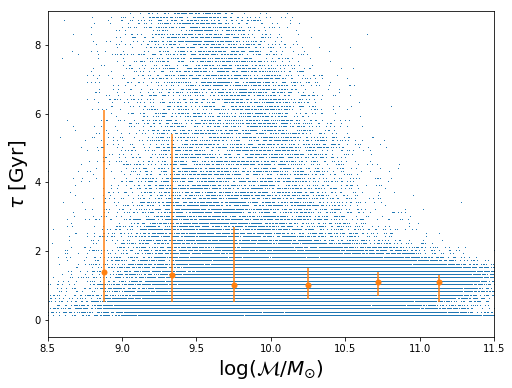

In [46]:
# Using my routine for plotting the median and the percentiles
plt.figure(figsize=(8,6))
plt.plot(log_mass,TAU,",",zorder=-20)
plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".",markersize=10)
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.xlim(8.5,11.5)
plt.ylim(-0.5,9)
plt.show()

In [47]:
def get_mean_percentiles(y,p1=0.25,p2=0.75):
    temp_ord = np.copy(y)
    temp_ord = np.sort(temp_ord)
    mean_y = np.mean(y)
    medians_y = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
    err_y_low  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y)
    err_y_high  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y)
    return mean_y,medians_y,err_y_low,err_y_high

def get_percentiles_from_median(y,p1=0.25,p2=0.75):
    temp_ord = np.copy(y)
    temp_ord = np.sort(temp_ord)
    #mean_y = np.mean(y)
    medians_y = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
    err_y_low  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-np.median(y))
    err_y_high  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-np.median(y))
    return err_y_low,err_y_high

def get_percentiles_from_mean(y,p1=0.25,p2=0.75):
    temp_ord = np.copy(y)
    temp_ord = np.sort(temp_ord)
    #mean_y = np.mean(y)
    #medians_y = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
    err_y_low  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-np.mean(y))
    err_y_high  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-np.mean(y))
    return err_y_low,err_y_high

In [48]:
#The comma makes things lists instead of np.array()
m1, = np.where(log_mass<9.0)
m2, = np.where((log_mass>=9.0)&(log_mass<9.5))
m3, = np.where((log_mass>=9.5)&(log_mass<10.))
m4, = np.where((log_mass>=10.)&(log_mass<10.5))
m5, = np.where((log_mass>=10.5)&(log_mass<11.))
m6, = np.where((log_mass>=11.))

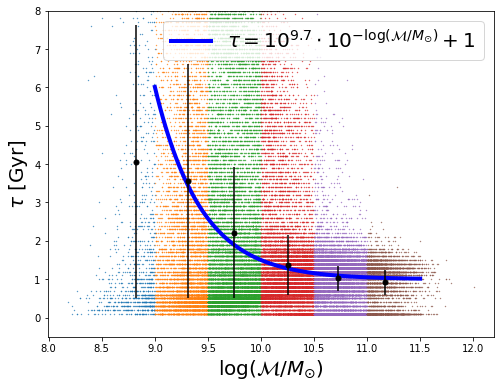

In [52]:
plt.figure(figsize=(8,6))

# THE MEAN IS GOOD TO OBTAIN THE RELATION BUT IT'S NOT FAIR BECAUSE THE MEDIAN THAT IS MORE REPRESENTATIVE 
# DOES NOT REPRODUCE THE RELATION

plt.plot(log_mass[m1],TAU[m1],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m2],TAU[m2],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m3],TAU[m3],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m4],TAU[m4],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m5],TAU[m5],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m6],TAU[m6],".",zorder=-40,markersize=0.7)


#plt.errorbar(np.mean(log_mass[m1]),np.mean(TAU[m1]),yerr=np.std(TAU[m1]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m2]),np.mean(TAU[m2]),yerr=np.std(TAU[m2]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m3]),np.mean(TAU[m3]),yerr=np.std(TAU[m3]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m4]),np.mean(TAU[m4]),yerr=np.std(TAU[m4]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m5]),np.mean(TAU[m5]),yerr=np.std(TAU[m5]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m6]),np.mean(TAU[m6]),yerr=np.std(TAU[m6]),fmt=".",zorder=-20,markersize=10,color='k')


plt.errorbar(np.mean(log_mass[m1]),np.mean(TAU[m1]),yerr=[get_percentiles_from_mean(TAU[m1])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m2]),np.mean(TAU[m2]),yerr=[get_percentiles_from_mean(TAU[m2])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m3]),np.mean(TAU[m3]),yerr=[get_percentiles_from_mean(TAU[m3])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m4]),np.mean(TAU[m4]),yerr=[get_percentiles_from_mean(TAU[m4])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m5]),np.mean(TAU[m5]),yerr=[get_percentiles_from_mean(TAU[m5])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m6]),np.mean(TAU[m6]),yerr=[get_percentiles_from_mean(TAU[m6])],fmt=".",zorder=-19,markersize=10,color='k')

xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})} +1$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(-0.5,8)
plt.legend()
plt.savefig("../plots/011/mass_tau_relation_mean.png")
plt.show()

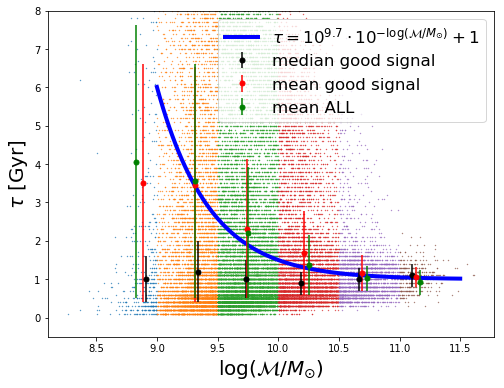

In [86]:
plt.figure(figsize=(8,6))

# 
# MEDIAN
#

good_SIGNAL = (NoiseToSignal<0.33)&(SFR_OII_log!=np.inf)&(SFR_OII_log!=-np.inf)&(SFR_SED_log!=np.inf)&(SFR_SED_log!=-np.inf)

#good_SIGNAL = (NoiseToSignal>-1000)

m1 = (log_mass<9.0)
m2 = (log_mass>=9.0)&(log_mass<9.5)
m3 = (log_mass>=9.5)&(log_mass<10.)
m4 = (log_mass>=10.)&(log_mass<10.5)
m5 = (log_mass>=10.5)&(log_mass<11.)
m6 = (log_mass>=11.)

sel_0405 = (Z>0.4)&(Z<=0.5)
sel_0506 = (Z>0.5)&(Z<=0.6)
sel_0607 = (Z>0.6)&(Z<=0.7)
sel_0708 = (Z>0.7)&(Z<=0.8)
sel_0809 = (Z>0.8)&(Z<=0.9)
sel_0910 = (Z>0.9)&(Z<=1.0)
sel_1011 = (Z>1.0)&(Z<=1.1)
sel_1013 = (Z>1.0)&(Z<=1.3)


plt.plot(log_mass[m1 & good_SIGNAL],TAU[m1 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m2 & good_SIGNAL],TAU[m2 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m3 & good_SIGNAL],TAU[m3 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m4 & good_SIGNAL],TAU[m4 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m5 & good_SIGNAL],TAU[m5 & good_SIGNAL],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m6 & good_SIGNAL],TAU[m6 & good_SIGNAL],".",zorder=-40,markersize=0.7)


#plt.errorbar(np.mean(log_mass[m1]),np.mean(TAU[m1]),yerr=np.std(TAU[m1]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m2]),np.mean(TAU[m2]),yerr=np.std(TAU[m2]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m3]),np.mean(TAU[m3]),yerr=np.std(TAU[m3]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m4]),np.mean(TAU[m4]),yerr=np.std(TAU[m4]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m5]),np.mean(TAU[m5]),yerr=np.std(TAU[m5]),fmt=".",zorder=-20,markersize=10,color='k')
#plt.errorbar(np.mean(log_mass[m6]),np.mean(TAU[m6]),yerr=np.std(TAU[m6]),fmt=".",zorder=-20,markersize=10,color='k')


plt.errorbar(np.median(log_mass[m1 & good_SIGNAL]),np.median(TAU[m1 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m1 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k',label='median good signal')
plt.errorbar(np.median(log_mass[m2 & good_SIGNAL]),np.median(TAU[m2 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m2 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m3 & good_SIGNAL]),np.median(TAU[m3 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m3 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m4 & good_SIGNAL]),np.median(TAU[m4 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m4 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m5 & good_SIGNAL]),np.median(TAU[m5 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m5 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m6 & good_SIGNAL]),np.median(TAU[m6 & good_SIGNAL]),yerr=[get_percentiles_from_median(TAU[m6 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='k')

plt.errorbar(np.mean(log_mass[m1 & good_SIGNAL]),np.mean(TAU[m1 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m1 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r',label='mean good signal')
plt.errorbar(np.mean(log_mass[m2 & good_SIGNAL]),np.mean(TAU[m2 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m2 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.mean(log_mass[m3 & good_SIGNAL]),np.mean(TAU[m3 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m3 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.mean(log_mass[m4 & good_SIGNAL]),np.mean(TAU[m4 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m4 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.mean(log_mass[m5 & good_SIGNAL]),np.mean(TAU[m5 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m5 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.mean(log_mass[m6 & good_SIGNAL]),np.mean(TAU[m6 & good_SIGNAL]),yerr=[get_percentiles_from_mean(TAU[m6 & good_SIGNAL])],fmt=".",zorder=-19,markersize=10,color='r')

plt.errorbar(np.mean(log_mass[m1]),np.mean(TAU[m1]),yerr=[get_percentiles_from_mean(TAU[m1])],fmt=".",zorder=-19,markersize=10,color='g',label='mean ALL')
plt.errorbar(np.mean(log_mass[m2]),np.mean(TAU[m2]),yerr=[get_percentiles_from_mean(TAU[m2])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.mean(log_mass[m3]),np.mean(TAU[m3]),yerr=[get_percentiles_from_mean(TAU[m3])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.mean(log_mass[m4]),np.mean(TAU[m4]),yerr=[get_percentiles_from_mean(TAU[m4])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.mean(log_mass[m5]),np.mean(TAU[m5]),yerr=[get_percentiles_from_mean(TAU[m5])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.mean(log_mass[m6]),np.mean(TAU[m6]),yerr=[get_percentiles_from_mean(TAU[m6])],fmt=".",zorder=-19,markersize=10,color='g')

xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})} +1$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(-0.5,8)
plt.legend(fontsize='small')
plt.savefig("../plots/011/mass_tau_relation_median_good_signal_ALL.png")
plt.show()

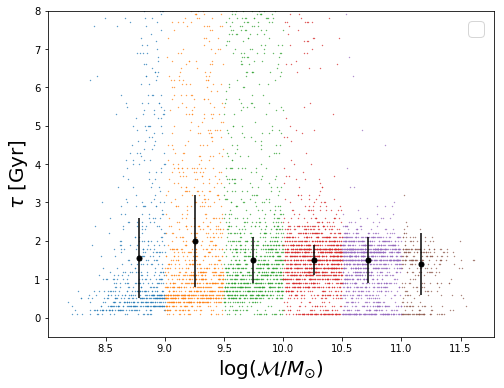

In [655]:
plt.figure(figsize=(8,6))

m1 = (log_mass<9.0)
m2 = (log_mass>=9.0)&(log_mass<9.5)
m3 = (log_mass>=9.5)&(log_mass<10.)
m4 = (log_mass>=10.)&(log_mass<10.5)
m5 = (log_mass>=10.5)&(log_mass<11.)
m6 = (log_mass>=11.)

sel_0405 = (Z>0.4)&(Z<=0.5)
sel_0506 = (Z>0.5)&(Z<=0.6)
sel_0607 = (Z>0.6)&(Z<=0.7)
sel_0708 = (Z>0.7)&(Z<=0.8)
sel_0809 = (Z>0.8)&(Z<=0.9)
sel_0910 = (Z>0.9)&(Z<=1.0)
sel_1013 = (Z>1.0)&(Z<=1.3)

plt.plot(log_mass[m1 & sel_0405],TAU[m1 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m2 & sel_0405],TAU[m2 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m3 & sel_0405],TAU[m3 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m4 & sel_0405],TAU[m4 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m5 & sel_0405],TAU[m5 & sel_0405],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m6 & sel_0405],TAU[m6 & sel_0405],".",zorder=-40,markersize=0.7)

plt.errorbar(np.mean(log_mass[m1 & sel_0405]),np.median(TAU[m1 & sel_0405]),yerr=[get_percentiles(TAU[m1 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m2 & sel_0405]),np.median(TAU[m2 & sel_0405]),yerr=[get_percentiles(TAU[m2 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m3 & sel_0405]),np.median(TAU[m3 & sel_0405]),yerr=[get_percentiles(TAU[m3 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m4 & sel_0405]),np.median(TAU[m4 & sel_0405]),yerr=[get_percentiles(TAU[m4 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m5 & sel_0405]),np.median(TAU[m5 & sel_0405]),yerr=[get_percentiles(TAU[m5 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.mean(log_mass[m6 & sel_0405]),np.median(TAU[m6 & sel_0405]),yerr=[get_percentiles(TAU[m6 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')

xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

#plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})}$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(-0.5,8)
plt.legend()
#plt.savefig("../plots/011/mass_tau_relation_0405.png")
plt.show()

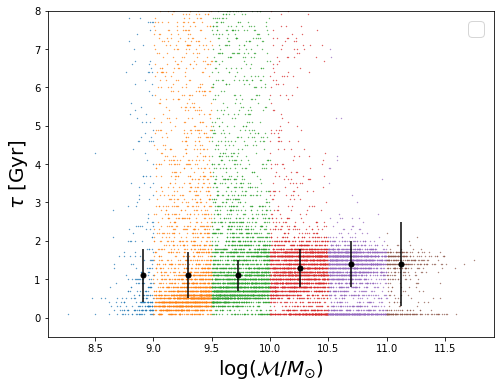

In [656]:
plt.figure(figsize=(8,6))

m1 = (log_mass<9.0)
m2 = (log_mass>=9.0)&(log_mass<9.5)
m3 = (log_mass>=9.5)&(log_mass<10.)
m4 = (log_mass>=10.)&(log_mass<10.5)
m5 = (log_mass>=10.5)&(log_mass<11.)
m6 = (log_mass>=11.)

sel_0405 = (Z>0.4)&(Z<=0.5)
sel_0506 = (Z>0.5)&(Z<=0.6)
sel_0607 = (Z>0.6)&(Z<=0.7)
sel_0708 = (Z>0.7)&(Z<=0.8)
sel_0809 = (Z>0.8)&(Z<=0.9)
sel_0910 = (Z>0.9)&(Z<=1.0)
sel_1013 = (Z>1.0)&(Z<=1.3)

plt.plot(log_mass[m1 & sel_0506],TAU[m1 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m2 & sel_0506],TAU[m2 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m3 & sel_0506],TAU[m3 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m4 & sel_0506],TAU[m4 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m5 & sel_0506],TAU[m5 & sel_0506],".",zorder=-40,markersize=0.7)
plt.plot(log_mass[m6 & sel_0506],TAU[m6 & sel_0506],".",zorder=-40,markersize=0.7)

plt.errorbar(np.median(log_mass[m1 & sel_0506]),np.median(TAU[m1 & sel_0506]),yerr=[get_percentiles(TAU[m1 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m2 & sel_0506]),np.median(TAU[m2 & sel_0506]),yerr=[get_percentiles(TAU[m2 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m3 & sel_0506]),np.median(TAU[m3 & sel_0506]),yerr=[get_percentiles(TAU[m3 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m4 & sel_0506]),np.median(TAU[m4 & sel_0506]),yerr=[get_percentiles(TAU[m4 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m5 & sel_0506]),np.median(TAU[m5 & sel_0506]),yerr=[get_percentiles(TAU[m5 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m6 & sel_0506]),np.median(TAU[m6 & sel_0506]),yerr=[get_percentiles(TAU[m6 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='k')

xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

#plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})}$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(-0.5,8)
plt.legend()
#plt.savefig("../plots/011/mass_tau_relation_0506.png")
plt.show()

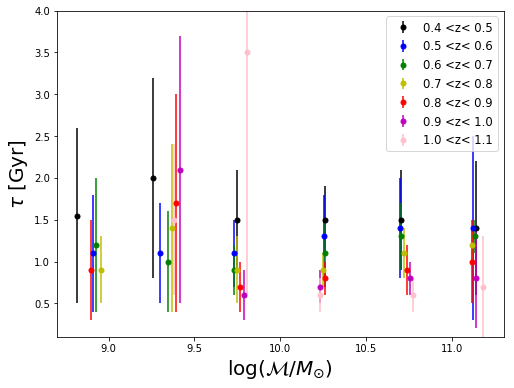

In [707]:
plt.figure(figsize=(8,6))

m1 = (log_mass<9.0)
m2 = (log_mass>=9.0)&(log_mass<9.5)
m3 = (log_mass>=9.5)&(log_mass<10.)
m4 = (log_mass>=10.)&(log_mass<10.5)
m5 = (log_mass>=10.5)&(log_mass<11.)
m6 = (log_mass>=11.)

sel_0405 = (Z>0.4)&(Z<=0.5)
sel_0506 = (Z>0.5)&(Z<=0.6)
sel_0607 = (Z>0.6)&(Z<=0.7)
sel_0708 = (Z>0.7)&(Z<=0.8)
sel_0809 = (Z>0.8)&(Z<=0.9)
sel_0910 = (Z>0.9)&(Z<=1.0)
sel_1011 = (Z>1.0)&(Z<=1.1)


plt.errorbar(np.median(log_mass[m1 & sel_0405]),np.median(TAU[m1 & sel_0405]),yerr=[get_percentiles(TAU[m1 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k',label='0.4 <z< 0.5')
plt.errorbar(np.median(log_mass[m2 & sel_0405]),np.median(TAU[m2 & sel_0405]),yerr=[get_percentiles(TAU[m2 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m3 & sel_0405]),np.median(TAU[m3 & sel_0405]),yerr=[get_percentiles(TAU[m3 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m4 & sel_0405]),np.median(TAU[m4 & sel_0405]),yerr=[get_percentiles(TAU[m4 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m5 & sel_0405]),np.median(TAU[m5 & sel_0405]),yerr=[get_percentiles(TAU[m5 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')
plt.errorbar(np.median(log_mass[m6 & sel_0405]),np.median(TAU[m6 & sel_0405]),yerr=[get_percentiles(TAU[m6 & sel_0405])],fmt=".",zorder=-19,markersize=10,color='k')

plt.errorbar(np.median(log_mass[m1 & sel_0506]),np.median(TAU[m1 & sel_0506]),yerr=[get_percentiles(TAU[m1 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b',label='0.5 <z< 0.6')
plt.errorbar(np.median(log_mass[m2 & sel_0506]),np.median(TAU[m2 & sel_0506]),yerr=[get_percentiles(TAU[m2 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')
plt.errorbar(np.median(log_mass[m3 & sel_0506]),np.median(TAU[m3 & sel_0506]),yerr=[get_percentiles(TAU[m3 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')
plt.errorbar(np.median(log_mass[m4 & sel_0506]),np.median(TAU[m4 & sel_0506]),yerr=[get_percentiles(TAU[m4 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')
plt.errorbar(np.median(log_mass[m5 & sel_0506]),np.median(TAU[m5 & sel_0506]),yerr=[get_percentiles(TAU[m5 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')
plt.errorbar(np.median(log_mass[m6 & sel_0506]),np.median(TAU[m6 & sel_0506]),yerr=[get_percentiles(TAU[m6 & sel_0506])],fmt=".",zorder=-19,markersize=10,color='b')

plt.errorbar(np.median(log_mass[m1 & sel_0607]),np.median(TAU[m1 & sel_0607]),yerr=[get_percentiles(TAU[m1 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g',label='0.6 <z< 0.7')
plt.errorbar(np.median(log_mass[m2 & sel_0607]),np.median(TAU[m2 & sel_0607]),yerr=[get_percentiles(TAU[m2 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.median(log_mass[m3 & sel_0607]),np.median(TAU[m3 & sel_0607]),yerr=[get_percentiles(TAU[m3 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.median(log_mass[m4 & sel_0607]),np.median(TAU[m4 & sel_0607]),yerr=[get_percentiles(TAU[m4 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.median(log_mass[m5 & sel_0607]),np.median(TAU[m5 & sel_0607]),yerr=[get_percentiles(TAU[m5 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')
plt.errorbar(np.median(log_mass[m6 & sel_0607]),np.median(TAU[m6 & sel_0607]),yerr=[get_percentiles(TAU[m6 & sel_0607])],fmt=".",zorder=-19,markersize=10,color='g')

plt.errorbar(np.median(log_mass[m1 & sel_0708]),np.median(TAU[m1 & sel_0708]),yerr=[get_percentiles(TAU[m1 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y',label='0.7 <z< 0.8')
plt.errorbar(np.median(log_mass[m2 & sel_0708]),np.median(TAU[m2 & sel_0708]),yerr=[get_percentiles(TAU[m2 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')
plt.errorbar(np.median(log_mass[m3 & sel_0708]),np.median(TAU[m3 & sel_0708]),yerr=[get_percentiles(TAU[m3 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')
plt.errorbar(np.median(log_mass[m4 & sel_0708]),np.median(TAU[m4 & sel_0708]),yerr=[get_percentiles(TAU[m4 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')
plt.errorbar(np.median(log_mass[m5 & sel_0708]),np.median(TAU[m5 & sel_0708]),yerr=[get_percentiles(TAU[m5 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')
plt.errorbar(np.median(log_mass[m6 & sel_0708]),np.median(TAU[m6 & sel_0708]),yerr=[get_percentiles(TAU[m6 & sel_0708])],fmt=".",zorder=-19,markersize=10,color='y')

plt.errorbar(np.median(log_mass[m1 & sel_0809]),np.median(TAU[m1 & sel_0809]),yerr=[get_percentiles(TAU[m1 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r',label='0.8 <z< 0.9')
plt.errorbar(np.median(log_mass[m2 & sel_0809]),np.median(TAU[m2 & sel_0809]),yerr=[get_percentiles(TAU[m2 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.median(log_mass[m3 & sel_0809]),np.median(TAU[m3 & sel_0809]),yerr=[get_percentiles(TAU[m3 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.median(log_mass[m4 & sel_0809]),np.median(TAU[m4 & sel_0809]),yerr=[get_percentiles(TAU[m4 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.median(log_mass[m5 & sel_0809]),np.median(TAU[m5 & sel_0809]),yerr=[get_percentiles(TAU[m5 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')
plt.errorbar(np.median(log_mass[m6 & sel_0809]),np.median(TAU[m6 & sel_0809]),yerr=[get_percentiles(TAU[m6 & sel_0809])],fmt=".",zorder=-19,markersize=10,color='r')

#plt.errorbar(np.median(log_mass[m1 & sel_0910]),np.median(TAU[m1 & sel_0910]),yerr=[get_percentiles(TAU[m1 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')
plt.errorbar(np.median(log_mass[m2 & sel_0910]),np.median(TAU[m2 & sel_0910]),yerr=[get_percentiles(TAU[m2 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')
plt.errorbar(np.median(log_mass[m3 & sel_0910]),np.median(TAU[m3 & sel_0910]),yerr=[get_percentiles(TAU[m3 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m',label='0.9 <z< 1.0')
plt.errorbar(np.median(log_mass[m4 & sel_0910]),np.median(TAU[m4 & sel_0910]),yerr=[get_percentiles(TAU[m4 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')
plt.errorbar(np.median(log_mass[m5 & sel_0910]),np.median(TAU[m5 & sel_0910]),yerr=[get_percentiles(TAU[m5 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')
plt.errorbar(np.median(log_mass[m6 & sel_0910]),np.median(TAU[m6 & sel_0910]),yerr=[get_percentiles(TAU[m6 & sel_0910])],fmt=".",zorder=-19,markersize=10,color='m')

#plt.errorbar(np.median(log_mass[m1 & sel_1011]),np.median(TAU[m1 & sel_1011]),yerr=[get_percentiles(TAU[m1 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')
plt.errorbar(np.median(log_mass[m2 & sel_1011]),np.median(TAU[m2 & sel_1011]),yerr=[get_percentiles(TAU[m2 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')
plt.errorbar(np.median(log_mass[m3 & sel_1011]),np.median(TAU[m3 & sel_1011]),yerr=[get_percentiles(TAU[m3 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink',label='1.0 <z< 1.1')
plt.errorbar(np.median(log_mass[m4 & sel_1011]),np.median(TAU[m4 & sel_1011]),yerr=[get_percentiles(TAU[m4 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')
plt.errorbar(np.median(log_mass[m5 & sel_1011]),np.median(TAU[m5 & sel_1011]),yerr=[get_percentiles(TAU[m5 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')
plt.errorbar(np.median(log_mass[m6 & sel_1011]),np.median(TAU[m6 & sel_1011]),yerr=[get_percentiles(TAU[m6 & sel_1011])],fmt=".",zorder=-19,markersize=10,color='pink')



xx = np.linspace(9.,11.5,100)

yy = 10**(9.7)*pow(10,-xx)+1

#plt.plot(xx,yy,lw=4,c='b',zorder=-21,label=r'$\tau = 10^{9.7}\cdot 10^{-\log(\mathcal{M}/M_{\odot})}$')

#plt.errorbar(x,y,yerr=[ey1,ey2],zorder=20,fmt=".")
plt.xlabel(r"$\log (\mathcal{M}/M_{\odot})$")
plt.ylabel(r"$\tau$ [Gyr]")
plt.ylim(0.1,4)
plt.legend(fontsize='xx-small',loc=1)
plt.savefig("../plots/011/mass_tau_relation_redshifts_median.png")
plt.show()

In [691]:
s = sel_0910 & m1

In [692]:
np.where(s==True)

(array([70715]),)

In [674]:
len(np.where(sel_0809==True)[0])

10289

In [675]:
len(np.where(sel_0910==True)[0])

6557

In [677]:
len(np.where(m6==True)[0])

5068

In [604]:
len(log_mass[sel_0607 & m6])

799

In [580]:
np.unique((log_mass[m6]-log_mass[sel_0607 and m6]))

array([0.])

In [582]:
m1 and m2

(array([    2,     9,    11, ..., 73137, 73143, 73154]),)

In [584]:
m1

(array([   38,    92,   178, ..., 73098, 73113, 73156]),)

In [585]:
m2

(array([    2,     9,    11, ..., 73137, 73143, 73154]),)

In [512]:
get_percentiles(TAU[m1])

(3.9578905, 20.84211)

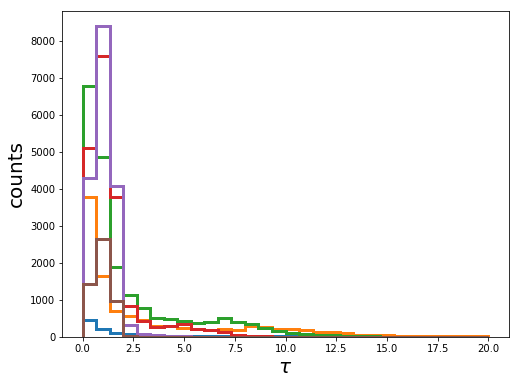

In [733]:
plt.figure(figsize=(8,6))
plt.hist(TAU[m1],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m2],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m3],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m4],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m5],bins=30,histtype='step',lw=3,range=(0,20))
plt.hist(TAU[m6],bins=30,histtype='step',lw=3,range=(0,20))
plt.xlabel(r'$\tau$')
plt.ylabel('counts')
plt.savefig("../plots/011/histo_taus_for_masses.png")
plt.show()

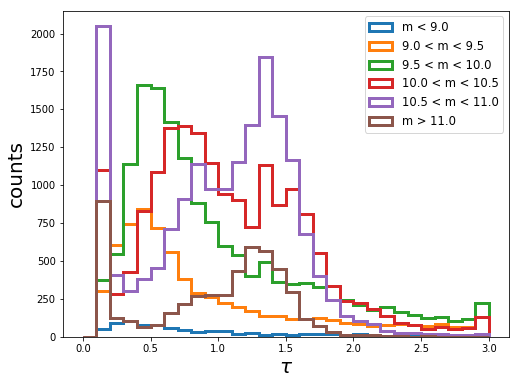

In [736]:
plt.figure(figsize=(8,6))
plt.hist(TAU[m1],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m < 9.0')
plt.hist(TAU[m2],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.0 < m < 9.5')
plt.hist(TAU[m3],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.5 < m < 10.0')
plt.hist(TAU[m4],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.0 < m < 10.5')
plt.hist(TAU[m5],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.5 < m < 11.0')
plt.hist(TAU[m6],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m > 11.0')
plt.xlabel(r'$\tau$')
plt.ylabel('counts')
plt.legend(fontsize='xx-small')
plt.savefig("../plots/011/histo_taus_for_masses_zoom.png")
plt.show()

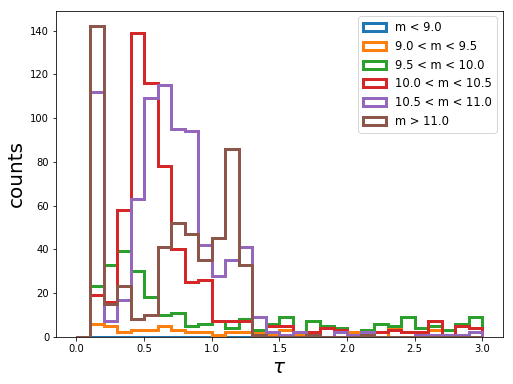

In [738]:
plt.figure(figsize=(8,6))
plt.hist(TAU[m1& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m < 9.0')
plt.hist(TAU[m2& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.0 < m < 9.5')
plt.hist(TAU[m3& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.5 < m < 10.0')
plt.hist(TAU[m4& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.0 < m < 10.5')
plt.hist(TAU[m5& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.5 < m < 11.0')
plt.hist(TAU[m6& sel_1011],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m > 11.0')
plt.xlabel(r'$\tau$')
plt.ylabel('counts')
plt.legend(fontsize='xx-small')
plt.savefig("../plots/011/histo_taus_for_masses_zoom_1011.png")
plt.show()

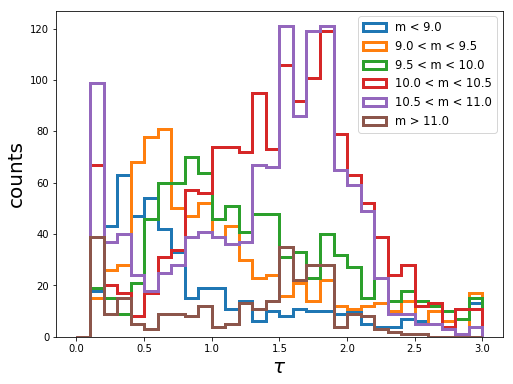

In [740]:
plt.figure(figsize=(8,6))
plt.hist(TAU[m1 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m < 9.0')
plt.hist(TAU[m2 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.0 < m < 9.5')
plt.hist(TAU[m3 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='9.5 < m < 10.0')
plt.hist(TAU[m4 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.0 < m < 10.5')
plt.hist(TAU[m5 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='10.5 < m < 11.0')
plt.hist(TAU[m6 & sel_0405],bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='m > 11.0')
plt.xlabel(r'$\tau$')
plt.ylabel('counts')
plt.legend(fontsize='xx-small')
plt.savefig("../plots/011/histo_taus_for_masses_zoom_0405.png")
plt.show()

In [490]:
np.linspace(9.,11.5,100)

array([ 9.        ,  9.02525253,  9.05050505,  9.07575758,  9.1010101 ,
        9.12626263,  9.15151515,  9.17676768,  9.2020202 ,  9.22727273,
        9.25252525,  9.27777778,  9.3030303 ,  9.32828283,  9.35353535,
        9.37878788,  9.4040404 ,  9.42929293,  9.45454545,  9.47979798,
        9.50505051,  9.53030303,  9.55555556,  9.58080808,  9.60606061,
        9.63131313,  9.65656566,  9.68181818,  9.70707071,  9.73232323,
        9.75757576,  9.78282828,  9.80808081,  9.83333333,  9.85858586,
        9.88383838,  9.90909091,  9.93434343,  9.95959596,  9.98484848,
       10.01010101, 10.03535354, 10.06060606, 10.08585859, 10.11111111,
       10.13636364, 10.16161616, 10.18686869, 10.21212121, 10.23737374,
       10.26262626, 10.28787879, 10.31313131, 10.33838384, 10.36363636,
       10.38888889, 10.41414141, 10.43939394, 10.46464646, 10.48989899,
       10.51515152, 10.54040404, 10.56565657, 10.59090909, 10.61616162,
       10.64141414, 10.66666667, 10.69191919, 10.71717172, 10.74

In [632]:
annas_arr = np.arange(100)
a = np.where(annas_arr < 20)
b = np.where(annas_arr%5 == 0)
print annas_arr[a],annas_arr[b]
c = np.intersect1d(a,b)



d = ((annas_arr< 20) & (annas_arr%5 == 0))
#print annas_arr[a & b]
print annas_arr[c]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
[ 0  5 10 15]


In [622]:
np.array(b)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

In [730]:
212/4

53

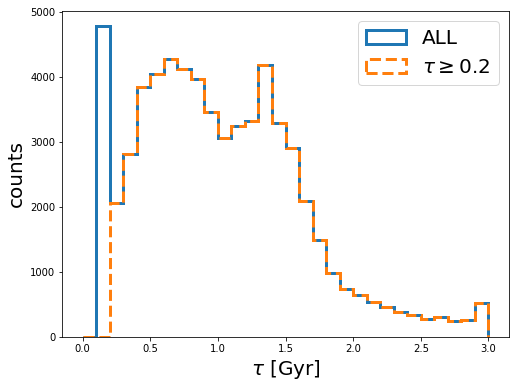

In [80]:
plt.figure(figsize=(8,6))
plt.hist(TAU,bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='ALL')
plt.hist(TAU[TAU>0.1],bins=30,normed=False,histtype='step',lw=3,range=(0,3),ls='dashed',label=r'$\tau \geq 0.2$')
plt.xlabel(r"$\tau$ [Gyr]")
plt.ylabel("counts")
plt.legend()
plt.savefig("../plots/011/taus_02.png")
plt.show()

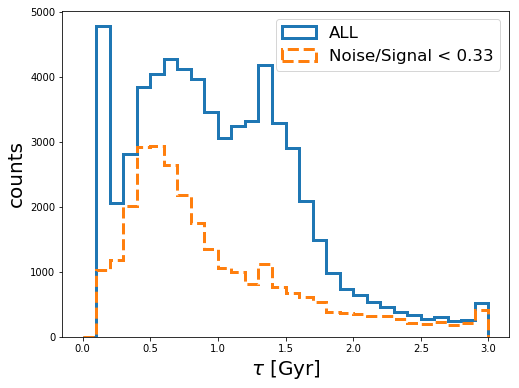

In [79]:
plt.figure(figsize=(8,6))
plt.hist(TAU,bins=30,normed=False,histtype='step',lw=3,range=(0,3),label='ALL')
#plt.hist(TAU[good_SIGNAL],bins=30,normed=False,histtype='step',lw=3,range=(0,3),ls='dashed')
plt.hist(TAU[NoiseToSignal<0.33],bins=30,normed=False,histtype='step',lw=3,range=(0,3),ls='dashed',label='Noise/Signal < 0.33')
plt.xlabel(r"$\tau$ [Gyr]")
plt.ylabel("counts")
plt.legend(fontsize='small')
plt.savefig("../plots/011/taus_good.png")
plt.show()

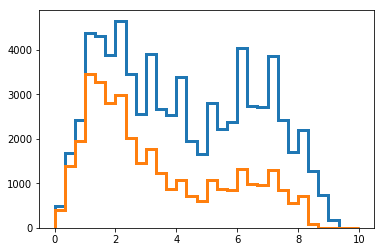

In [72]:
plt.hist(AGE,bins=30,normed=False,histtype='step',lw=3,range=(0,10))
plt.hist(AGE[good_SIGNAL],bins=30,normed=False,histtype='step',lw=3,range=(0,10))
plt.show()

# Understanding redshift of formation

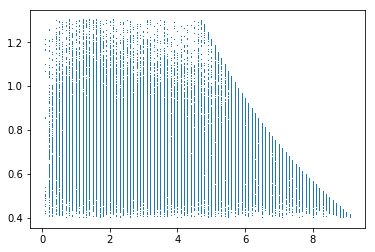

In [75]:
plt.plot(AGE,Z,',')